In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functions.CreateYarnGeneral import CreateYarn
from functions.CreateComposite import CreateComposite

In [2]:
!rm *.brep *.inp

In [3]:
# cualquier curva periodica puede ser describida por una serie de fourier




r = 5

trajs =[]  

fc1 = lambda x: np.sqrt(r**2 - x**2)
x12 = np.linspace(0,r,2000)
y12 = fc1(x12)

trajs.append( np.array([x12,y12, np.zeros_like(x12)]).T )

# =============================================================================

fc1 = lambda x: -np.sqrt(r**2 - (x-2*r)**2) + 2*r
x12 = np.linspace(r,3*r,2000)
y12 = fc1(x12)

trajs.append( np.array([x12,y12, np.zeros_like(x12)]).T )

# =============================================================================
fc1 = lambda x: np.sqrt(r**2 - (x-4*r)**2) 
x12 = np.linspace(3*r,4*r,2000)
y12 = fc1(x12)

trajs.append( np.array([x12,y12, np.zeros_like(x12)]).T )



(np.float64(-1.0), np.float64(21.0), np.float64(-0.5), np.float64(10.5))

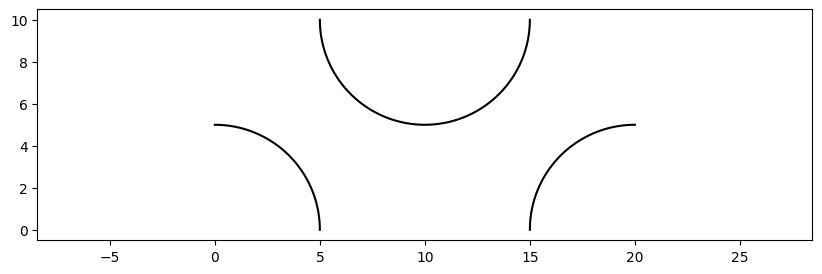

In [4]:

fig = plt.figure()
fig.set_size_inches(10, 3)
# compute fourier coefficients
for itraj in trajs:

    plt.plot(itraj[:,0], itraj[:,1], 'k')

plt.axis('equal')

In [5]:
itraj

array([[15.        ,  0.        ,  0.        ],
       [15.00250125,  0.15813365,  0.        ],
       [15.0050025 ,  0.22360677,  0.        ],
       ...,
       [19.9949975 ,  4.9999975 ,  0.        ],
       [19.99749875,  4.99999937,  0.        ],
       [20.        ,  5.        ,  0.        ]])

In [6]:
radius = 1

first_vectors = [ [1, 0, 0] , [0, -1, 0], [0, 1, 0] ]
last_vectors  = [ [0, -1, 0], [0,  1, 0], [1, 0, 0] ]

for i,itraj in enumerate(trajs):

    file = "yarn_" + str(i) + ".brep"

    CreateYarn({"trajs": itraj, 
                "radius": radius, 
                "last_vector": last_vectors[i],
                "first_vector": first_vectors[i],
                "num_points": 20,
                "file": file})

In [7]:
# merge all the yarns

import gmsh

gmsh.initialize()
gmsh.model.add("composite")

for i in range(3):
    gmsh.merge("yarn_" + str(i) + ".brep")

yarns = gmsh.model.getEntities(3)
dz = 3*radius
box = gmsh.model.occ.addBox(0  , 0  , -dz/2, 
                            4*r, 2*r, dz)
# cut 
gmsh.model.occ.synchronize()

gmsh.model.occ.cut([(3, box)], yarns, removeTool=False)
# 

# the box mesh must be periodic in the x direction, y direction and z direction

gmsh.model.occ.synchronize()


# Obtener las caras de la caja cortada
box_faces = gmsh.model.getBoundary([(3, box)], oriented=False, recursive=False)


gmsh.model.occ.synchronize()


# mesh
gmsh.option.setNumber("Mesh.CharacteristicLengthMin", radius*0.1)
gmsh.option.setNumber("Mesh.CharacteristicLengthMax", 4*radius)
gmsh.option.setNumber("Mesh.MeshSizeFromCurvature", 10)
gmsh.option.setNumber("Mesh.AngleSmoothNormals", 10)
gmsh.option.setNumber("Mesh.Smoothing", 10)	
gmsh.option.setNumber("Mesh.Algorithm", 2)

gmsh.model.occ.synchronize()
gmsh.model.mesh.generate(3)
gmsh.model.mesh.setOrder(2)

# save in inp format
gmsh.write("composite_RVE.inp")




Info    : Reading 'yarn_0.brep'...
Info    : Done reading 'yarn_0.brep'
Info    : Reading 'yarn_1.brep'...
Info    : Done reading 'yarn_1.brep'
Info    : Reading 'yarn_2.brep'...
Info    : Done reading 'yarn_2.brep'
Info    : Meshing 1D...ence                                                                                                          
Info    : [  0%] Meshing curve 1 (Circle)
Info    : [ 10%] Meshing curve 2 (BSpline)
Info    : [ 10%] Meshing curve 3 (Circle)
Info    : [ 10%] Meshing curve 4 (BSpline)
Info    : [ 10%] Meshing curve 5 (Circle)
Info    : [ 10%] Meshing curve 6 (BSpline)
Info    : [ 10%] Meshing curve 7 (Circle)
Info    : [ 10%] Meshing curve 8 (BSpline)
Info    : [ 10%] Meshing curve 9 (Circle)
Info    : [ 10%] Meshing curve 10 (BSpline)
Info    : [ 10%] Meshing curve 11 (Circle)
Info    : [ 10%] Meshing curve 12 (BSpline)
Info    : [ 10%] Meshing curve 13 (Circle)
Info    : [ 20%] Meshing curve 14 (BSpline)
Info    : [ 20%] Meshing curve 15 (Circle)
Info   

In [8]:
from djccx.inp.inp import inp

Wine está instalado. Versión: wine-9.0
Wine is installed. Calculix will be run with windows binary


In [9]:
inp_f = inp("composite_RVE.inp")
inp_f.remove_by_type(2)
inp_f.remove_by_type(1)

inp_f.print("composite_no_solid_RVE.inp")

In [10]:
young = 2960
imaterial = inp_f.CreateElasticMaterial("elastic",young,0.0)
allelset  = inp_f.CreateElsetAll()

inp_f.CreateSolidSection(allelset,imaterial)
istep = inp_f.CreateStaticStep(nlgeom=True)


In [11]:
import os
join = os.path.join
inflation_folder = join("output")

if not os.path.exists(inflation_folder):
    os.makedirs(inflation_folder)

In [12]:
frd = inp_f.run(inflation_folder)

Running Calculix at:  output
Output file:  /home/djoroya/projects/CITISENS/CITISENS_Composite/scripts/RVE/output/out.txt
Command:
 wine /home/djoroya/projects/CITISENS/CITISENS_Composite/.conda/lib/python3.13/site-packages/djccx/bin/ccx_dynamic.exe main > out.txt
Error reading cvf file

pid:  1220959 

Calculix finished



IndexError: list index out of range